In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

## Loading the data

In [122]:
train_raw = pd.read_csv("C:/Users/yashd/Downloads/titanic/train.csv", header=0)
test_df = pd.read_csv("C:/Users/yashd/Downloads/titanic/test.csv", header=0)
train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
#Making a copy of the training data
train_df = train_raw.copy()
print(train_df.shape)

(891, 12)


## Preprocessing the data

<AxesSubplot:>

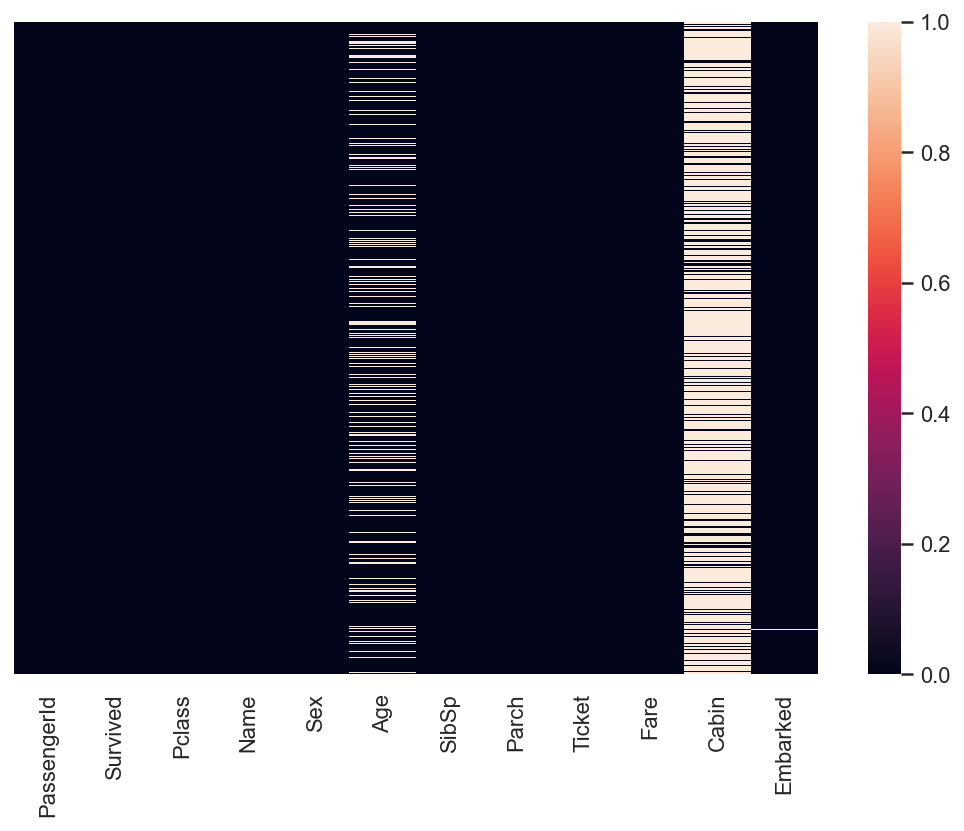

In [124]:
#Visualizing null values in each column
sns.heatmap(train_df.isna(), yticklabels=False)

In [125]:
#Checking for null values
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [126]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [127]:
#Deleting Cabin column since too many null values
#Also deleting other unnecessary columns
train_df_2 = train_df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
train_df_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


c:\users\yashd\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\yashd\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

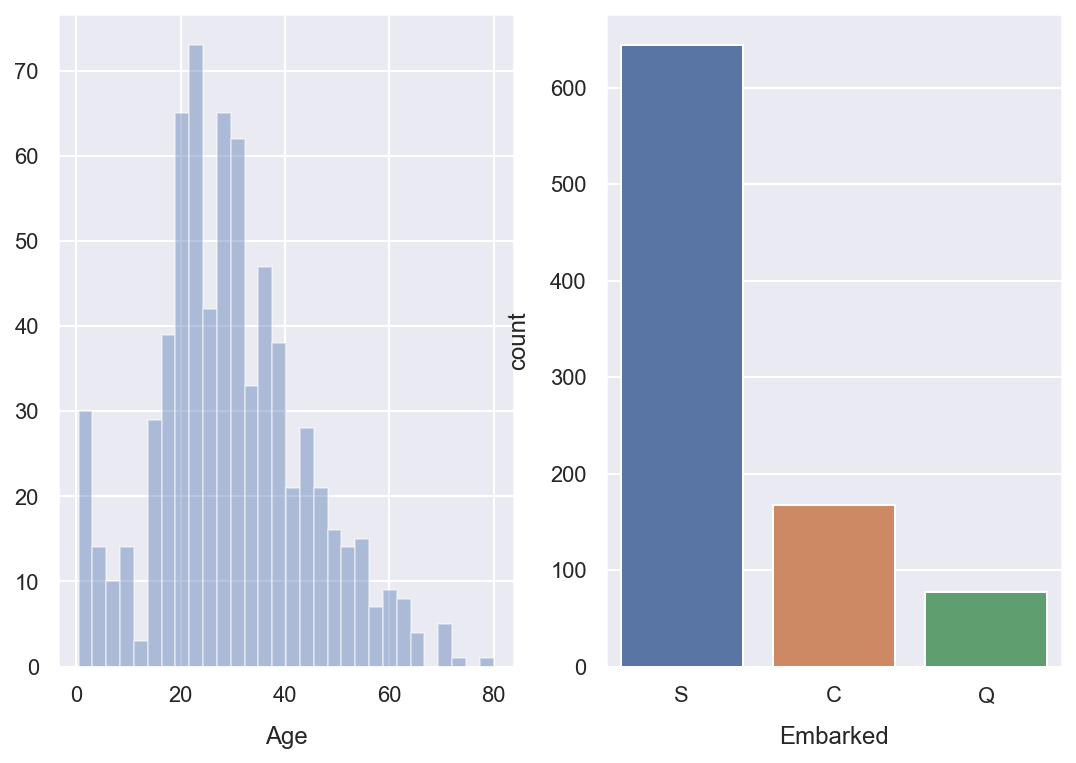

In [138]:
#Visualizing distribution of Age and Embarked values
fig, axes = plt.subplots(1,2)
sns.distplot(train_df_2['Age'], ax=axes[0], bins=30, kde=False)
sns.countplot(train_df_2['Embarked'], ax=axes[1])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

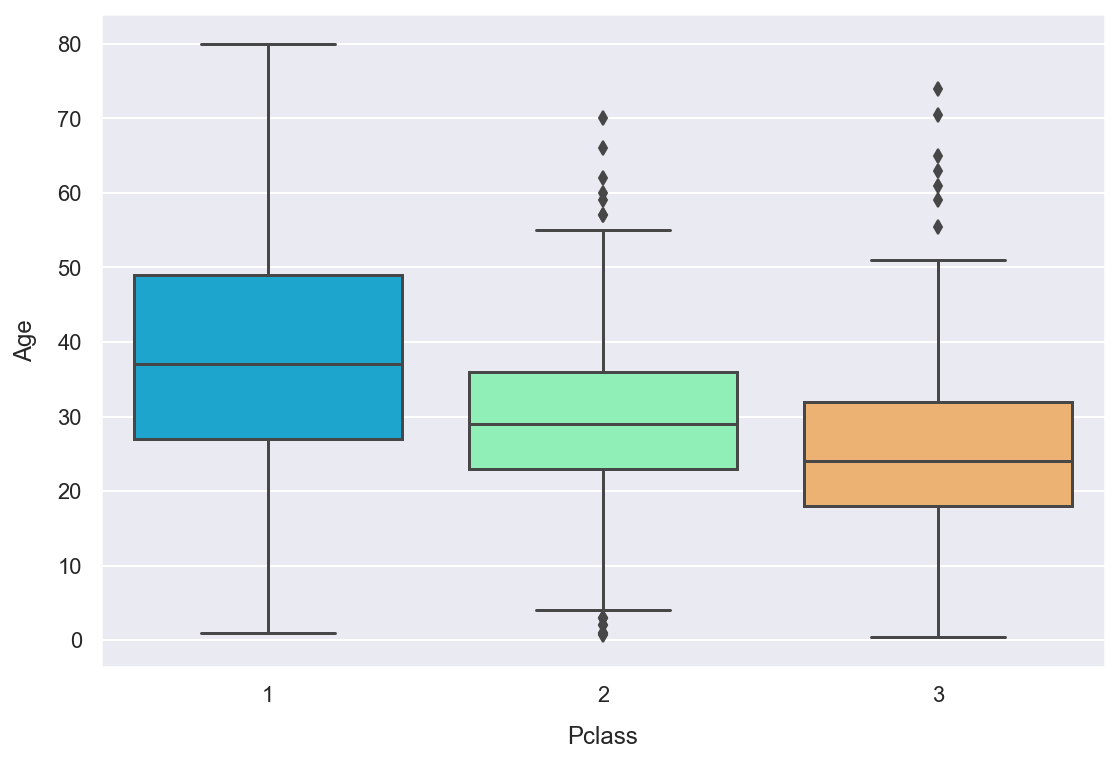

In [141]:
#Creating boxplot to view relation between Age and Pclass
sns.boxplot(x='Pclass', y='Age', data=train_df_2, palette='rainbow')

In [144]:
dict={}
for i in train_df_2['Pclass'].unique():
    dict[i] = train_df_2.loc[train_df_2['Pclass'] == i]['Age'].mean()
    print(f"For Pclass {i}: Mean Age: {dict[i]}")

For Pclass 3: Mean Age: 25.14061971830986
For Pclass 1: Mean Age: 38.233440860215055
For Pclass 2: Mean Age: 29.87763005780347


In [145]:
#Filling null values for age as per above criteria
def fillna_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return dict[1].round(2)
        elif Pclass == 2:
            return dict[2].round(2)
        else:
            return dict[3].round(2)
    else:
        return Age

In [148]:
#Applying the above function
train_df_2['Age'] = train_df_2[['Age','Pclass']].apply(fillna_age, axis=1)
train_df_2['Age'].isna().sum()

0

In [149]:
#Checking value counts for Embarked attribute
train_df_2['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [150]:
#Filling the null values with mode of Embarked values ("S")
train_df_nonull = train_df_2.copy()
train_df_nonull['Embarked'] = train_df_nonull['Embarked'].fillna("S")
train_df_nonull.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

<AxesSubplot:>

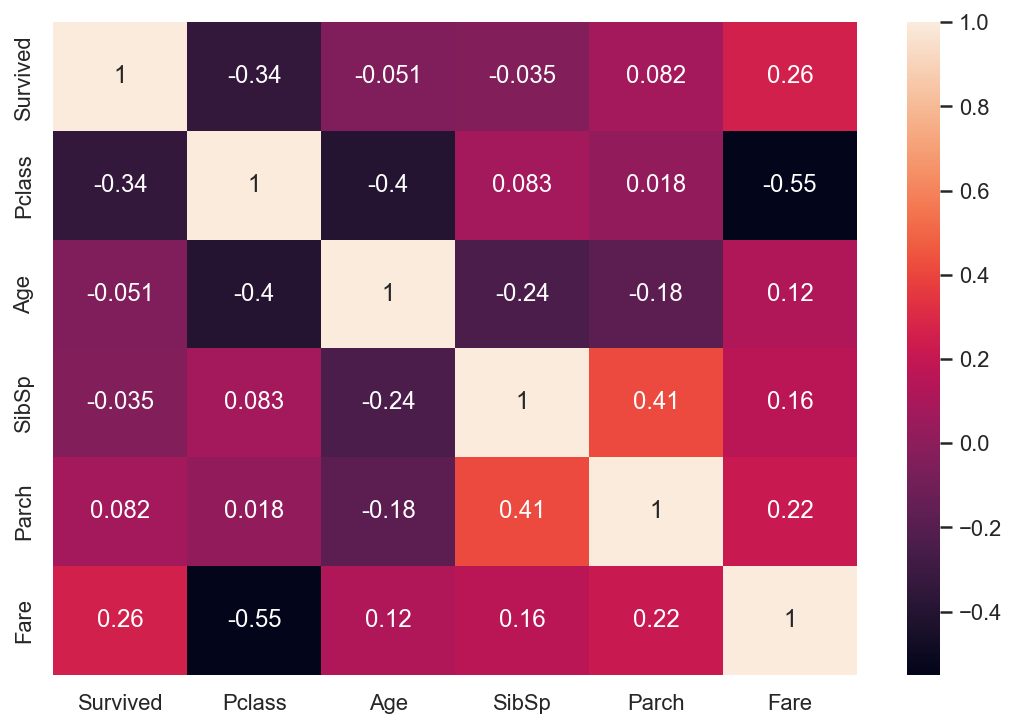

In [151]:
#Checking correlation between features
correlations = train_df_nonull.corr()
sns.heatmap(correlations, annot=True)

In [152]:
# Creating dummy variables for the categorical attributes
train_df_dummies = pd.get_dummies(train_df_nonull, drop_first=True)
train_df_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Creating a model

In [153]:
#Defining inputs and target
y_train = train_df_dummies['Survived']
X_train = train_df_dummies.drop(['Survived'], axis=1)

In [154]:
# Creating a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)
print(f"Logit model accuracy: {model.score(X_train, y_train)}")

Logit model accuracy: 0.8080808080808081


c:\users\yashd\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [155]:
# Checking accuracy through confusion matrix
print(confusion_matrix(y_train, model.predict(X_train)))

[[479  70]
 [101 241]]


# Testing the model

In [156]:
#Defining x_test
x_test_1 = test_df.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)
#Creating dummy variables for categorical attributes
x_test_2 = pd.get_dummies(x_test_1, drop_first=True)
x_test_2.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [157]:
#Checking for null values
x_test_2.isna().sum()

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [158]:
#Checking age and fare mean and median values
print(f"Mean fare: {x_test_2.Fare.mean()}")
print(f"Median fare: {x_test_2.Fare.median()}")
print(f"Mean age: {x_test_2.Age.mean()}")
print(f"Median age: {x_test_2.Age.median()}")

Mean fare: 35.627188489208635
Median fare: 14.4542
Mean age: 30.272590361445783
Median age: 27.0


In [159]:
#Replacing null values with median of respective attributes
x_test_2["Age"] = x_test_2["Age"].fillna(x_test_2["Age"].median())
x_test_2["Fare"] = x_test_2["Fare"].fillna(x_test_2["Fare"].median())
x_test_2.isna().any()

Pclass        False
Age           False
SibSp         False
Parch         False
Fare          False
Sex_male      False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [163]:
#Predicting the outcome using our trained model
submission_df = pd.DataFrame(columns = ['PassengerId','Survived'])
submission_df['PassengerId'] = test_df['PassengerId']
submission_df['Survived'] = model.predict(x_test_2)
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Exporting results to csv file

In [164]:
submission_df.to_csv('submission_df.csv', index=False)